In [1]:
#Import de módulos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [2]:
#Carregando Arquivo de Treino
treino = pd.read_csv('train.csv', sep="," , encoding="UTF8" )

In [3]:
#Carregando Arquivo de Teste
teste = pd.read_csv('test.csv', sep="," , encoding="UTF8" )

In [4]:
#verificação de Linhas e Colunas
teste.shape

(4570, 43)

In [5]:
#verificação de Linhas e Colunas
treino.shape

(13730, 167)

In [6]:
#Seleção das colunas
colunas = list(teste.columns)
colunas.append('IN_TREINEIRO')
treino = treino[colunas]

In [7]:
#Verificando valores nulos
treino.isnull().sum()

NU_INSCRICAO                 0
CO_UF_RESIDENCIA             0
SG_UF_RESIDENCIA             0
NU_IDADE                     0
TP_SEXO                      0
TP_COR_RACA                  0
TP_NACIONALIDADE             0
TP_ST_CONCLUSAO              0
TP_ANO_CONCLUIU              0
TP_ESCOLA                    0
TP_ENSINO                 9448
TP_DEPENDENCIA_ADM_ESC    9448
IN_BAIXA_VISAO               0
IN_CEGUEIRA                  0
IN_SURDEZ                    0
IN_DISLEXIA                  0
IN_DISCALCULIA               0
IN_SABATISTA                 0
IN_GESTANTE                  0
IN_IDOSO                     0
TP_PRESENCA_CN               0
TP_PRESENCA_CH               0
TP_PRESENCA_LC               0
TP_PRESENCA_MT               0
NU_NOTA_CN                3389
NU_NOTA_CH                3389
NU_NOTA_LC                3597
TP_LINGUA                    0
TP_STATUS_REDACAO         3597
NU_NOTA_COMP1             3597
NU_NOTA_COMP2             3597
NU_NOTA_COMP3             3597
NU_NOTA_

In [8]:
# Preecher dados faltantes com zero 
treino = treino.fillna(0)
teste = teste.fillna(0)

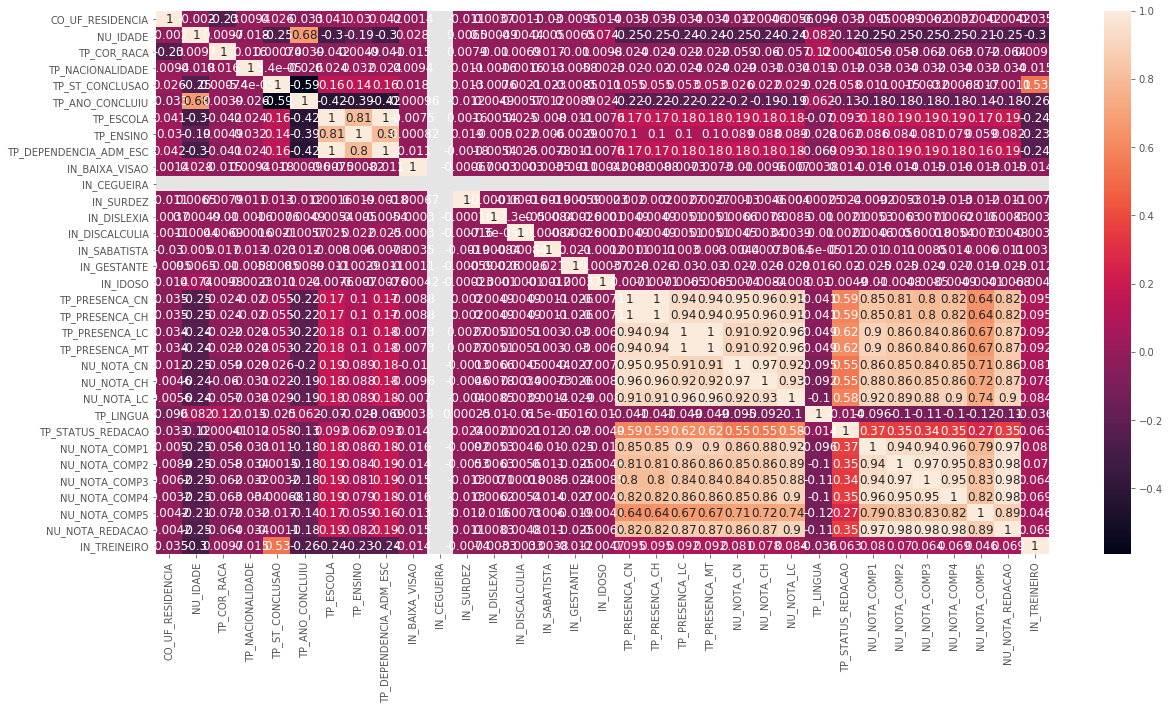

In [9]:
mapa = treino.corr()
ax = plt.subplots(figsize=(20, 10))
sns.heatmap(mapa,  annot=True, annot_kws={"size": 12})

In [10]:
corr = treino.corr()['IN_TREINEIRO'].sort_values()
corr

NU_IDADE                 -0.295091
TP_ANO_CONCLUIU          -0.257710
TP_ESCOLA                -0.244562
TP_DEPENDENCIA_ADM_ESC   -0.243705
TP_ENSINO                -0.225151
TP_LINGUA                -0.036395
CO_UF_RESIDENCIA         -0.034944
TP_NACIONALIDADE         -0.015179
IN_BAIXA_VISAO           -0.013602
IN_GESTANTE              -0.011893
IN_SURDEZ                -0.007374
IN_IDOSO                 -0.004663
IN_DISCALCULIA           -0.003297
IN_DISLEXIA              -0.003297
IN_SABATISTA              0.003824
TP_COR_RACA               0.009676
NU_NOTA_COMP5             0.045809
TP_STATUS_REDACAO         0.063190
NU_NOTA_COMP3             0.064340
NU_NOTA_COMP4             0.068862
NU_NOTA_REDACAO           0.069119
NU_NOTA_COMP2             0.069545
NU_NOTA_CH                0.078276
NU_NOTA_COMP1             0.080326
NU_NOTA_CN                0.080915
NU_NOTA_LC                0.083731
TP_PRESENCA_MT            0.092454
TP_PRESENCA_LC            0.092454
TP_PRESENCA_CH      

In [35]:
treino_filtrado = corr[(corr > 0.2) | (corr < -0.037)]
treino_filtrado = treino_filtrado.index
treino = treino[treino_filtrado]

KeyError: "['TP_ESCOLA', 'NU_IDADE', 'TP_ANO_CONCLUIU', 'TP_DEPENDENCIA_ADM_ESC', 'TP_ENSINO'] not in index"

In [34]:
#Setando a variável TARGET
y_treino = treino['IN_TREINEIRO']

In [26]:
#Setar as colunas selecionadas
x_treino = treino.drop(columns = 'IN_TREINEIRO')
x_teste = teste[x_treino.columns]

In [27]:
#Normalização
x_treino = scaler.fit_transform(x_treino) 
x_teste = scaler.transform(x_teste)

In [28]:
classificador = RandomForestClassifier()
classificador.fit(x_treino, y_treino)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
predito = classificador.predict(x_teste)

In [30]:
predito

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [31]:
resposta = pd.DataFrame()
resposta['IN_TREINEIRO'] = np.around(predito,2)
resposta

,IN_TREINEIRO
0,0
1,0
2,1
3,0
4,0
...,...
4565,0
4566,0
4567,0
4568,0


In [32]:
resposta.to_csv('answer.csv', index=False, header=True)